In [161]:
import numpy as np
import math
import random
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Exercise 3

In [8]:
def GD(gradient_function, gamma, x1, steps, timelimit=None):
    t = time.time()
    
    all_points=[np.array(x1)]
    for i in range(1,steps+1):
        x=all_points[i-1]-gamma*gradient_function(all_points[i-1])
        #x=pd(x) #if necessery add PD function
        all_points.append(x)
        
        if timelimit != None and time.time() - t > timelimit:
                print('    Time limit reached!')
                break
        
    return all_points
        
def PGD(gradient_function, gamma, mu, x1, steps, timelimit=None):
    t = time.time()
    
    all_points=[x1, x1]
    x=x1
    for i in range(2,steps+2):
        x = all_points[i-1]-gamma*gradient_function(all_points[i-1])+mu*(all_points[i-1]-all_points[i-2])
        #x=pd(x) #if necessery add PD function
        all_points.append(x)
        
        if timelimit != None and time.time() - t > timelimit:
                print('    Time limit reached!')
                break
        
    return all_points
        
def NGD(gradient_function, gamma, mu, x1, steps, timelimit=None):
    t = time.time()
    
    all_points=[x1, x1]
    x=x1
    for i in range(2,steps+2):
        x = all_points[i-1] - \
            gamma*gradient_function(all_points[i-1] + mu*(all_points[i-1]-all_points[i-2])) + \
            mu*(all_points[i-1]-all_points[i-2])
        #x=pd(x) #if necessery add PD function
        all_points.append(x)
        
        if timelimit != None and time.time() - t > timelimit:
                print('    Time limit reached!')
                break
        
    return all_points
        
def AGD(gradient_function, gamma, x1, steps, timelimit=None):
    t = time.time()
    
    all_points=[x1]
    all_gradients=np.ones(len(x1))
    
    for i in range(1,steps+1):
        gradient_step=gradient_function(all_points[i-1])
        D=np.diag(1/np.sqrt(all_gradients))
        x = all_points[i-1] - gamma*D*gradient_step
            
        #x=pd(x) #if necessery add PD function
        all_gradients+=gradient_step**2
        all_points.append(x)
        
        if timelimit != None and time.time() - t > timelimit:
                print('    Time limit reached!')
                break
        
    return all_points

### Exercise 4

In [9]:
def NewtonMethod(hessian_matrix, gradient_function, x1, steps, timelimit=None):
    #all_points=np.zeros((steps+1, len(x1)))
    t = time.time()
    
    all_points=[x1]
    for i in range(1,steps+1):
        x=all_points[i-1]-np.dot(np.linalg.inv(hessian_matrix(all_points[i-1])),gradient_function(all_points[i-1]))
        #print(x)
        #x=pd(x) #if necessery add PD function
        #all_points[i,:]=x
        all_points.append(x)
        
        if timelimit != None and time.time() - t > timelimit:
                print('    Time limit reached!')
                break
        
    return all_points

def BFGS(gradient_function, x1, steps, timelimit=None):
    t = time.time()
    
    B=np.eye(len(x1))
    all_points=[x1, x1-np.dot(B,gradient_function(x1))]
    
    for i in range(steps):
        xk, xk_1 = all_points[-1], all_points[-2]
        grad_xk, grad_xk_1 = gradient_function(xk), gradient_function(xk_1)
        
        gamma = grad_xk-grad_xk_1
        delta = xk-xk_1
        
        #print(all_points)
        #print(grad_xk)
        #print(grad_xk_1)
        gamma=gamma[..., None]
        delta=delta[..., None]
        
        if delta.T.dot(gamma) == 0:
            print('    BFGS OVERFLOW!!!')
            return all_points
        
        B_new = B - (delta.dot(gamma.T.dot(B)) + B.dot(gamma).dot(delta.T)) / (delta.T.dot(gamma)) + \
             (1 + (gamma.T.dot(B).dot(gamma)) / (delta.T.dot(gamma))) * (delta * delta.T) / (delta.T.dot(gamma))      
        
        all_points.append(xk-B_new.dot(gradient_function(xk)))
        B=B_new
        
        #print(time.time() - t)
        if timelimit != None and time.time() - t > timelimit:
                print('    Time limit reached!')
                break
        
    return all_points

### Exercise 1 solution checking

In [104]:
def gradient_function_gd(x):
    return 2*x

print(GD(gradient_function_gd, 1, -1, 10))

def gradient_function_pgd(x):
    return 6*x+2

print(PGD(gradient_function_pgd, 0.5, 1, 0, 10))

def gradient_function_ngd(x):
    return 2*x-1

##print(NGD(gradient_function_ngd, 2/3, 1, 0, 1 , 10))

[array(-1), 1, -1, 1, -1, 1, -1, 1, -1, 1, -1]
[0, 0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1.0]


### Exercise 5

In [213]:
def commpare_all(hessian_function, gradient_function, x1, gamma, mu, actual_min):
    
    print(f"Testing all the methods on 2 steps, shown bellow is the distance from the actual minimum x*")
    print(f"    Gradient descend: {np.sum(np.square(GD(gradient_function, gamma, x1, 2)[-1]- actual_min)):.5f}")
    print(f"    Polyak gradient: {np.sum(np.square(PGD(gradient_function, gamma, mu, x1, 2)[-1]- actual_min)):.5f}")
    print(f"    Nestorov gradient descend: {np.sum(np.square(NGD(gradient_function, gamma, mu, x1, 2)[-1]- actual_min)):.5f}")
    print(f"    Newton method: {np.sum(np.square(NewtonMethod(hessian_function, gradient_function, x1, 2)[-1]- actual_min))}")
    print(f"    BFGS method: {np.sum(np.square(BFGS(gradient_function, x1, 10)[-1]- actual_min))}")
    
    
    print(f"Testing all the methods on 5 steps, shown bellow is the distance from the actual minimum x*")
    print(f"    Gradient descend: {np.sum(np.square(GD(gradient_function, gamma, x1, 5)[-1]- actual_min)):.5f}")
    print(f"    Polyak gradient: {np.sum(np.square(PGD(gradient_function, gamma, mu, x1, 5)[-1]- actual_min)):.5f}")
    print(f"    Nestorov gradient descend: {np.sum(np.square(NGD(gradient_function, gamma, mu, x1, 5)[-1]- actual_min)):.5f}")
    print(f"    Newton method: {np.sum(np.square(NewtonMethod(hessian_function, gradient_function, x1, 5)[-1]- actual_min))}")
    print(f"    BFGS method: {np.sum(np.square(BFGS(gradient_function, x1, 5)[-1]- actual_min))}")
    
    print(f"Testing all the methods on 10 steps, shown bellow is the distance from the actual minimum x*")
    print(f"    Gradient descend: {np.sum(np.square(GD(gradient_function, gamma, x1, 10)[-1]- actual_min)):.5f}")
    print(f"    Polyak gradient: {np.sum(np.square(PGD(gradient_function, gamma, mu, x1, 10)[-1]- actual_min)):.5f}")
    print(f"    Nestorov gradient descend: {np.sum(np.square(NGD(gradient_function, gamma, mu, x1, 10)[-1]- actual_min)):.5f}")
    print(f"    Newton method: {np.sum(np.square(NewtonMethod(hessian_function, gradient_function, x1, 10)[-1]- actual_min))}")
    print(f"    BFGS method: {np.sum(np.square(BFGS(gradient_function, x1, 10)[-1]- actual_min))}")
    
    print(f"Testing all the methods on 100 steps, shown bellow is the distance from the actual minimum x*")
    print(f"    Gradient descend: {np.sum(np.square(GD(gradient_function, gamma, x1, 100)[-1]- actual_min)):.5f}")
    print(f"    Polyak gradient: {np.sum(np.square(PGD(gradient_function, gamma, mu, x1, 100)[-1]- actual_min)):.5f}")
    print(f"    Nestorov gradient descend: {np.sum(np.square(NGD(gradient_function, gamma, mu, x1, 100)[-1]- actual_min)):.5f}")
    print(f"    Newton method: {np.sum(np.square(NewtonMethod(hessian_function, gradient_function, x1, 100)[-1]- actual_min)):.5f}")
    print(f"    BFGS method: {np.sum(np.square(BFGS(gradient_function, x1, 100)[-1]- actual_min)):.5f}")
    
    print("Testing on time now...")
    print(f"Testing all the methods on 0.1 seconds, shown bellow is the distance from the actual minimum x*")
    print(f"    Gradient descend: {np.sum(np.square(GD(gradient_function, gamma, x1, 1000000000000000000, 0.1)[-1]- actual_min))}")
    print(f"    Polyak gradient: {np.sum(np.square(PGD(gradient_function, gamma, mu, x1, 1000000000000000000, 0.1)[-1]- actual_min))}")
    print(f"    Nestorov gradient descend: {np.sum(np.square(NGD(gradient_function, gamma, mu, x1, 1000000000000000000, 0.1)[-1]- actual_min))}")
    print(f"    Newton method: {np.sum(np.square(NewtonMethod(hessian_function, gradient_function, x1, 1000000000000000000, 0.1)[-1]- actual_min))}")
    print(f"    BFGS method: {np.sum(np.square(BFGS(gradient_function, x1, 1000000000000000000, 0.1)[-1]- actual_min))}")
    
    print(f"Testing all the methods on 1 seconds, shown bellow is the distance from the actual minimum x*")
    print(f"    Gradient descend: {np.sum(np.square(GD(gradient_function, gamma, x1, 10000000000000000000000000, 1)[-1]- actual_min))}")
    print(f"    Polyak gradient: {np.sum(np.square(PGD(gradient_function, gamma, mu, x1, 10000000000000000000000000, 1)[-1]- actual_min))}")
    print(f"    Nestorov gradient descend: {np.sum(np.square(NGD(gradient_function, gamma, mu, x1, 10000000000000000000000000, 1)[-1]- actual_min))}")
    print(f"    Newton method: {np.sum(np.square(NewtonMethod(hessian_function, gradient_function, x1, 10000000000000000000000000, 1)[-1]- actual_min))}")
    print(f"    BFGS method: {np.sum(np.square(BFGS(gradient_function, x1, 10000000000000000000000000, 1)[-1]- actual_min))}")
    
    print(f"Testing all the methods on 2 seconds, shown bellow is the distance from the actual minimum x*")
    print(f"    Gradient descend: {np.sum(np.square(GD(gradient_function, gamma, x1, 10000000000000000000000000, 2)[-1]- actual_min))}")
    print(f"    Polyak gradient: {np.sum(np.square(PGD(gradient_function, gamma, mu, x1, 10000000000000000000000000, 2)[-1]- actual_min))}")
    print(f"    Nestorov gradient descend: {np.sum(np.square(NGD(gradient_function, gamma, mu, x1, 10000000000000000000000000, 2)[-1]- actual_min))}")
    print(f"    Newton method: {np.sum(np.square(NewtonMethod(hessian_function, gradient_function, x1, 10000000000000000000000000, 2)[-1]- actual_min))}")
    print(f"    BFGS method: {np.sum(np.square(BFGS(gradient_function, x1, 10000000000000000000000000, 2)[-1]- actual_min))}")
    

The first function on which we are going to compare all approaches is:
$$f(x,y,z)=(x-z)^{2}+(2y+z)^{2}+(4x-2y+z)^{2}+x+y$$
First we will start with 
$$x_{1}=(0,0,0)$$

In [214]:
def gradient_function_a_part(X):
    x,y,z = X[0], X[1], X[2]
    return np.array([34*x-16*y+6*z+1, -16*x+16*y+1, 6*x+6*z])

def hessian_function_a_part(_):
    return np.array([
        np.array([34, -16, 6]),
        np.array([-16, 16, 0]),
        np.array([6, 0, 6]),
    ])

gamma = 0.01
mu = 0.05
x1=np.array([0,0,0])
actual_min = np.array([-1/6, -11/48, 1/6])

commpare_all(hessian_function_a_part, gradient_function_a_part, x1, gamma, mu, actual_min)

Testing all the methods on 2 steps, shown bellow is the distance from the actual minimum x*
    Gradient descend: 0.09337
    Polyak gradient: 0.09301
    Nestorov gradient descend: 0.09303
    Newton method: 1.5407439555097887e-33
    BFGS method: 8.520524277920641e-16
Testing all the methods on 5 steps, shown bellow is the distance from the actual minimum x*
    Gradient descend: 0.07586
    Polyak gradient: 0.07473
    Nestorov gradient descend: 0.07478
    Newton method: 1.5407439555097887e-33
    BFGS method: 0.046619878826407814
Testing all the methods on 10 steps, shown bellow is the distance from the actual minimum x*
    Gradient descend: 0.05475
    Polyak gradient: 0.05305
    Nestorov gradient descend: 0.05311
    Newton method: 1.5407439555097887e-33
    BFGS method: 8.520524277920641e-16
Testing all the methods on 100 steps, shown bellow is the distance from the actual minimum x*
    Gradient descend: 0.00027
    Polyak gradient: 0.00019
    Nestorov gradient descend: 0.0

and then 
$$x_{1}=(1,1,0)$$

In [215]:
gamma = 0.01
mu = 0.05
x1=np.array([1,1,0])
actual_min = np.array([-1/6, -11/48, 1/6])

commpare_all(hessian_function_a_part, gradient_function_a_part, x1, gamma, mu, actual_min)

Testing all the methods on 2 steps, shown bellow is the distance from the actual minimum x*
    Gradient descend: 2.19513
    Polyak gradient: 2.17947
    Nestorov gradient descend: 2.18129
    Newton method: 0.0
    BFGS method: 2.311115933264683e-33
Testing all the methods on 5 steps, shown bellow is the distance from the actual minimum x*
    Gradient descend: 1.58360
    Polyak gradient: 1.54683
    Nestorov gradient descend: 1.54945
    Newton method: 2.311115933264683e-33
    BFGS method: 1.4411677504448062e-09
Testing all the methods on 10 steps, shown bellow is the distance from the actual minimum x*
    Gradient descend: 0.99750
    Polyak gradient: 0.95503
    Nestorov gradient descend: 0.95750
    Newton method: 2.311115933264683e-33
    BFGS method: 2.311115933264683e-33
Testing all the methods on 100 steps, shown bellow is the distance from the actual minimum x*
    Gradient descend: 0.00407
    Polyak gradient: 0.00295
    Nestorov gradient descend: 0.00298
    Newton met

The first function on which we are going to compare all approaches is:
$$(x-1)^{2}+(y-1)^{2}+100(y-x^{2})^{2}+100(z-y^{2})^{2}$$
First we will start with 
$$x_{1}=(1.2, 1.2, 1.2)$$


In [216]:
#Second function
def gradient_function_b_part(X):
    x, y, z = X[0], X[1], X[2]
    return np.array([2*(x-1)-400*x*(y-x**2), 2*(y-1)+200*(y-x**2)-400*y*(z-y**2), 200*(z-y**2)])

def hessian_function_b_part(X):
    x, y, z = X[0], X[1], X[2]
    return np.array([
        [-400*(y-x**2) + 800*x**2 + 2, -400*x, 0],
        [-400*x, -400*(z-y**2) + 800*y**2 + 202, -400*y],
        [0, -400*y, 200]
    ])


gamma = 0.0001
mu = 0.1
x1=np.array([1.2, 1.2, 1.2])
actual_min = np.array([1, 1, 1])

commpare_all(hessian_function_b_part, gradient_function_b_part, x1, gamma, mu, actual_min)

Testing all the methods on 2 steps, shown bellow is the distance from the actual minimum x*
    Gradient descend: 0.11045
    Polyak gradient: 0.10999
    Nestorov gradient descend: 0.11004
    Newton method: 0.06862321660838383
    BFGS method: nan
Testing all the methods on 5 steps, shown bellow is the distance from the actual minimum x*
    Gradient descend: 0.10119
    Polyak gradient: 0.10003
    Nestorov gradient descend: 0.10014
    Newton method: 0.000168833131814448
    BFGS method: 1.5086514831559803e+50
Testing all the methods on 10 steps, shown bellow is the distance from the actual minimum x*
    Gradient descend: 0.09315
    Polyak gradient: 0.09202
    Nestorov gradient descend: 0.09213
    Newton method: 0.0
    BFGS method: nan
Testing all the methods on 100 steps, shown bellow is the distance from the actual minimum x*
    Gradient descend: 0.08542
    Polyak gradient: 0.08532
    Nestorov gradient descend: 0.08533
    Newton method: 0.00000
    BFGS method: nan
Testi

<ipython-input-216-9f1823781d78>:4: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([2*(x-1)-400*x*(y-x**2), 2*(y-1)+200*(y-x**2)-400*y*(z-y**2), 200*(z-y**2)])


    Time limit reached!
    Polyak gradient: 0.02925397863682173
    Time limit reached!
    Nestorov gradient descend: 0.038286533427595804
    Time limit reached!
    Newton method: 0.0
    Time limit reached!
    BFGS method: nan
Testing all the methods on 1 seconds, shown bellow is the distance from the actual minimum x*
    Time limit reached!
    Gradient descend: 6.469020925437517e-07
    Time limit reached!
    Polyak gradient: 2.692928584785769e-06
    Time limit reached!
    Nestorov gradient descend: 1.2434498464866268e-05
    Time limit reached!
    Newton method: 0.0
    Time limit reached!
    BFGS method: nan
Testing all the methods on 2 seconds, shown bellow is the distance from the actual minimum x*
    Time limit reached!
    Gradient descend: 1.0122531610683364e-12
    Time limit reached!
    Polyak gradient: 1.0688468814207739e-11
    Time limit reached!
    Nestorov gradient descend: 3.4587406090219427e-10
    Time limit reached!
    Newton method: 0.0
    Time lim

and then,
$$x_{1}=(-1, 1.2, 1.2)$$

In [25]:
gamma = 0.0001
mu = 0.1
x1=np.array([-1, 1.2, 1.2])
actual_min = np.array([1, 1, 1])

commpare_all(hessian_function_b_part, gradient_function_b_part, x1, gamma, mu, actual_min)

Testing all the methods on 2 steps, shown bellow is the distance from the actual minimum x*
    Gradient descend: 4.12931
    Polyak gradient: 4.13204
    Nestorov gradient descend: 4.13161
    Newton method: 4.09248
    BFGS method: nan
Testing all the methods on 5 steps, shown bellow is the distance from the actual minimum x*
    Gradient descend: 4.18023
    Polyak gradient: 4.18757
    Nestorov gradient descend: 4.18636
    Newton method: 3.57209
    BFGS method: 2.4892343743311203e+79
Testing all the methods on 10 steps, shown bellow is the distance from the actual minimum x*
    Gradient descend: 4.22509
    Polyak gradient: 4.23184
    Nestorov gradient descend: 4.23078
    Newton method: 877.49327
    BFGS method: nan
Testing all the methods on 100 steps, shown bellow is the distance from the actual minimum x*
    Gradient descend: 4.24667
    Polyak gradient: 4.24539
    Nestorov gradient descend: 4.24542
    Newton method: 0.00000
    BFGS method: nan
Testing on time now...
T

The first function on which we are going to compare all approaches is:
$$(1.5-x+xy)^{2}+(2.25-x+xy^{2})^{2}+(2.625-x+xy^{3})^{2}$$
First we will start with 
$$x_{1}=(1, 1)$$

In [217]:
def gradient_function_c_part(X):
    x, y = X[0], X[1]
    return np.array([2*(1.5-x+x*y)*(y-1)+2*(2.25-x+x*y**2)*(y**2-1)+2*(2.625-x+x*y**3)*(y**3-1), \
                    2*(1.5-x+x*y)*x+4*(2.25-x+x*y**2)*(x*y)+6*(2.625-x+x*y**3)*(x*y**2)])

def hessian_matrix_c_part(X):
    x, y = X[0], X[1]
    return np.array([[2*(y**6+y**4-2*y**3-y**2-2*y+3), 2*x*(6*y**5+4*y**3-6*y**2-2*y-2)+15.75*y**2+9*y+3], \
                    [2*x*(6*y**5+4*y**3-6*y**2-2*y-2)+15.75*y**2+9*y+3, 2*x*(x*(15*y**4+6*y**2-6*y-1)+6*2.625*y+4.5*y)]])

#x1=(1,1,0)


gamma = 0.0001
mu = 0.1
x1=np.array([1,1])
actual_min = np.array([3, 0.5])

commpare_all(hessian_matrix_c_part, gradient_function_c_part, x1, gamma, mu, actual_min)

Testing all the methods on 2 steps, shown bellow is the distance from the actual minimum x*
    Gradient descend: 4.24447
    Polyak gradient: 4.24419
    Nestorov gradient descend: 4.24419
    Newton method: 9.25
    BFGS method: nan
Testing all the methods on 5 steps, shown bellow is the distance from the actual minimum x*
    Gradient descend: 4.23620
    Polyak gradient: 4.23502
    Nestorov gradient descend: 4.23501
    Newton method: 9.25
    BFGS method: nan
Testing all the methods on 10 steps, shown bellow is the distance from the actual minimum x*
    Gradient descend: 4.22247
    Polyak gradient: 4.21979
    Nestorov gradient descend: 4.21978
    Newton method: 9.25
    BFGS method: nan
Testing all the methods on 100 steps, shown bellow is the distance from the actual minimum x*
    Gradient descend: 3.98408
    Polyak gradient: 3.95600
    Nestorov gradient descend: 3.95591
    Newton method: 9.25000
    BFGS method: nan
Testing on time now...
Testing all the methods on 0.1 

<ipython-input-217-2b80ffedcb74>:3: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([2*(1.5-x+x*y)*(y-1)+2*(2.25-x+x*y**2)*(y**2-1)+2*(2.625-x+x*y**3)*(y**3-1), \
<ipython-input-217-2b80ffedcb74>:4: RuntimeWarning: invalid value encountered in double_scalars
  2*(1.5-x+x*y)*x+4*(2.25-x+x*y**2)*(x*y)+6*(2.625-x+x*y**3)*(x*y**2)])


    Time limit reached!
    Polyak gradient: 0.3072808506784999
    Time limit reached!
    Nestorov gradient descend: 0.3890290195882501
    Time limit reached!
    Newton method: 9.25
    Time limit reached!
    BFGS method: nan
Testing all the methods on 1 seconds, shown bellow is the distance from the actual minimum x*
    Time limit reached!
    Gradient descend: 0.0007257447947076049
    Time limit reached!
    Polyak gradient: 0.0005181942929336989
    Time limit reached!
    Nestorov gradient descend: 0.0011661545534209724
    Time limit reached!
    Newton method: 9.25
    Time limit reached!
    BFGS method: nan
Testing all the methods on 2 seconds, shown bellow is the distance from the actual minimum x*
    Time limit reached!
    Gradient descend: 2.070774620628967e-06
    Time limit reached!
    Polyak gradient: 1.9138550265357493e-06
    Time limit reached!
    Nestorov gradient descend: 7.310316779653059e-06
    Time limit reached!
    Newton method: 9.25
    Time limit 

and then
$$x_{1}=(4.5, 4.5)$$

In [32]:
gamma = 1e-6
mu = 0.5
x1=np.array([4.5, 4.5])
actual_min = np.array([3, 0.5])

commpare_all(hessian_matrix_c_part, gradient_function_c_part, x1, gamma, mu, actual_min)

Testing all the methods on 2 steps, shown bellow is the distance from the actual minimum x*
    Gradient descend: 14.81387
    Polyak gradient: 13.89379
    Nestorov gradient descend: 14.08709
    Newton method: 7.91576
    BFGS method: nan
Testing all the methods on 5 steps, shown bellow is the distance from the actual minimum x*
    Gradient descend: 12.15934
    Polyak gradient: 9.39337
    Nestorov gradient descend: 9.96291
    Newton method: 3.52364
    BFGS method: nan
Testing all the methods on 10 steps, shown bellow is the distance from the actual minimum x*
    Gradient descend: 9.82881
    Polyak gradient: 6.85520
    Nestorov gradient descend: 7.32214
    Newton method: 8.58271
    BFGS method: nan
Testing all the methods on 100 steps, shown bellow is the distance from the actual minimum x*
    Gradient descend: 3.58792
    Polyak gradient: 2.41752
    Nestorov gradient descend: 2.46649
    Newton method: 9.25000
    BFGS method: nan
Testing on time now...
Testing all the me

<ipython-input-28-2b80ffedcb74>:3: RuntimeWarning: overflow encountered in double_scalars
  return np.array([2*(1.5-x+x*y)*(y-1)+2*(2.25-x+x*y**2)*(y**2-1)+2*(2.625-x+x*y**3)*(y**3-1), \
<ipython-input-28-2b80ffedcb74>:4: RuntimeWarning: overflow encountered in double_scalars
  2*(1.5-x+x*y)*x+4*(2.25-x+x*y**2)*(x*y)+6*(2.625-x+x*y**3)*(x*y**2)])


    Time limit reached!
    Polyak gradient: 0.591760579479422
    Time limit reached!
    Nestorov gradient descend: 0.6130932251854818
    Time limit reached!
    Newton method: 9.25
    Time limit reached!
    BFGS method: nan
Testing all the methods on 1 seconds, shown bellow is the distance from the actual minimum x*
    Time limit reached!
    Gradient descend: 0.6210439526028628
    Time limit reached!
    Polyak gradient: 0.5685557506095547
    Time limit reached!
    Nestorov gradient descend: 0.5886862503580663
    Time limit reached!
    Newton method: 9.25
    Time limit reached!
    BFGS method: nan
Testing all the methods on 2 seconds, shown bellow is the distance from the actual minimum x*
    Time limit reached!
    Gradient descend: 0.6064765047218923
    Time limit reached!
    Polyak gradient: 0.5493178759305221
    Time limit reached!
    Nestorov gradient descend: 0.5701152965926732
    Time limit reached!
    Newton method: 9.25
    Time limit reached!
    BFGS me

### Exercise 6

Lets first define SGD and L-BFGS

In [111]:
def SGD(_, gamma, x1, steps, timelimit=None):
    t = time.time()
    all_points=[np.array(x1)]
    
    intercept=x1[0]
    beta=x1[1]
    n=X.shape[0]
    
    for i in range(1,steps+1):
        j = np.random.randint(0, X.shape[0])
        instance=X[j,:]
        label=y[j]
        
        intercept=all_points[-1][0]
        beta=all_points[-1][1]
        
        x=all_points[-1]-gamma*np.array([2/n*(beta*instance[1]+intercept-label), 2/n*(beta*instance[1]+intercept-label)*instance[1]])
        #x=pd(x) #if necessery add PD function
        all_points.append(x)
        
        if timelimit != None and time.time() - t > timelimit:
                print('    Time limit reached!')
                break
        
    return all_points

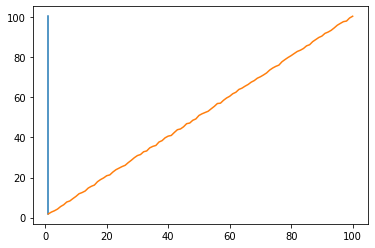

In [26]:
def generate_points(N):
    random.seed(0)
    x=np.array([i for i in range(1,N+1)])
    y=np.array([i+random.uniform(0, 1) for i in range(1,N+1)])
    return np.insert(x[...,None], 0, np.ones(x.shape[0]), axis=1), y


X, y = generate_points(100)

plt.plot(X,y)
plt.show()

In [14]:
linr_model = LinearRegression().fit(X[:,1][...,None], y)
print(linr_model.coef_)
print(linr_model.intercept_)

[1.00060802]
0.5549681217666134


In [184]:
def f(params):
    y_pred=np.dot(X, params[...,None])
    n=X.shape[0]
    return np.sum((y_pred-y[...,None])**2)/n

def gradf(params):
    y_pred=np.dot(X, params[...,None])
    residuals=y_pred - y[...,None]
    n=X.shape[0]
    return np.array([2/n*np.sum(residuals), 2/n*np.dot(residuals[:,0], X[:,1])])

def Hf(_):
    n=X.shape[0]
    return np.array([
        [2, 2/n*np.sum(X[:,1])],
        [2/n*np.sum(X[:,1]), 2/n*np.sum(X[:,1]**2)]
    ])


def f_lbfgs(params, *args):
    X, y = args[0], args[1]
    return f(params)

def gradf_lbfgs(params, *args):
    X, y = args[0], args[1]
    return gradf(params)

In [220]:
from scipy.optimize import fmin_l_bfgs_b

def fit_model(N, hessian_function, gradient_function, x1, gamma, gamma_sgd, steps):
    X, y = generate_points(N)
    
    params = fmin_l_bfgs_b(f_lbfgs, fprime=gradf_lbfgs, x0=x1, approx_grad=False, args=(X,y), maxfun=steps)
    
    print(f"Fitting a linear regression model using all methods on {N} points, using {steps} steps...")
    print(f"    Gradient descend: {GD(gradient_function, gamma, x1, steps)[-1]}")
    print(f"    Stochastic descend: {SGD(_, gamma_sgd, x1, steps)[-1]}")
    print(f"    Newton method: {NewtonMethod(hessian_function, gradient_function, x1, steps)[-1]}")
    print(f"    BFGS method: {BFGS(gradient_function, x1, steps)[-1]}")
    print(f'    LBFGS method:[{params[0]}]')
    
    print(f"And the function values...")
    print(f"    Gradient descend: {f(GD(gradient_function, gamma, x1, steps)[-1])}")
    print(f"    Stochastic descend: {f(SGD(_, gamma_sgd, x1, steps)[-1])}")
    print(f"    Newton method: {f(NewtonMethod(hessian_function, gradient_function, x1, steps)[-1])}")
    print(f"    BFGS method: {f(BFGS(gradient_function, x1, steps)[-1])}")
    print(f'    LBFGS method:[{f(params[0])}]')

Fitting model to points generated as:
$${(i, i+Uniform(0,1)}$$

First up we start by generating 50 points and testing all methods how they perform when we do 50 or 1000 steps.

In [221]:
x1=np.array([0,0])
gamma=0.00001
gamma_sgd=0.00001
fit_model(50, Hf, gradf, x1, gamma, gamma_sgd, 50)

Fitting a linear regression model using all methods on 50 points, using 50 steps...
    Gradient descend: [0.01473602 0.97833451]
    Stochastic descend: [0.00050451 0.03428872]
    Newton method: [0.55496812 1.00060802]
    BFGS OVERFLOW!!!
    BFGS method: [0.55496812 1.00060802]
    LBFGS method:[[0.55496813 1.00060802]]
And the function values...
    Gradient descend: 3.255401915102025
    Stochastic descend: 3214.696907787424
    Newton method: 0.06964631475088329
    BFGS OVERFLOW!!!
    BFGS method: 0.06964631475088344
    LBFGS method:[0.0696463147508833]


In [222]:
x1=np.array([0, 0])
gamma=0.00001
gamma_sgd=0.001
fit_model(50, Hf, gradf, x1, gamma, gamma_sgd, 1000)

Fitting a linear regression model using all methods on 50 points, using 1000 steps...
    Gradient descend: [0.01770798 1.00862741]
    Stochastic descend: [0.01912556 1.00876245]
    Newton method: [0.55496812 1.00060802]
    BFGS OVERFLOW!!!
    BFGS method: [0.55496812 1.00060802]
    LBFGS method:[[0.55496813 1.00060802]]
And the function values...
    Gradient descend: 0.1407313856281898
    Stochastic descend: 0.14408289274225114
    Newton method: 0.06964631475088329
    BFGS OVERFLOW!!!
    BFGS method: 0.06964631475088344
    LBFGS method:[0.0696463147508833]


Then we generate 100 points.

In [223]:
x1=np.array([0, 0])
gamma=0.00001
gamma_sgd=0.00001
fit_model(100, Hf, gradf, x1, gamma, gamma_sgd, 50)

Fitting a linear regression model using all methods on 100 points, using 50 steps...
    Gradient descend: [0.01473602 0.97833451]
    Stochastic descend: [0.00048258 0.03371817]
    Newton method: [0.55496812 1.00060802]
    BFGS OVERFLOW!!!
    BFGS method: [0.55496812 1.00060802]
    LBFGS method:[[0.55496813 1.00060802]]
And the function values...
    Gradient descend: 3.255401915102025
    Stochastic descend: 3236.9948419580546
    Newton method: 0.06964631475088329
    BFGS OVERFLOW!!!
    BFGS method: 0.06964631475088344
    LBFGS method:[0.0696463147508833]


In [224]:
x1=np.array([0, 0])
gamma=0.00001
gamma_sgd=0.00001
fit_model(100, Hf, gradf, x1, gamma, gamma_sgd, 1000)

Fitting a linear regression model using all methods on 100 points, using 1000 steps...
    Gradient descend: [0.01770798 1.00862741]
    Stochastic descend: [0.00749578 0.50067931]
    Newton method: [0.55496812 1.00060802]
    BFGS OVERFLOW!!!
    BFGS method: [0.55496812 1.00060802]
    LBFGS method:[[0.55496813 1.00060802]]
And the function values...
    Gradient descend: 0.1407313856281898
    Stochastic descend: 873.9409662364535
    Newton method: 0.06964631475088329
    BFGS OVERFLOW!!!
    BFGS method: 0.06964631475088344
    LBFGS method:[0.0696463147508833]


Then we generate 1000 points

In [225]:
x1=np.array([0, 0])
gamma=0.00001
gamma_sgd=0.00001
fit_model(1000, Hf, gradf, x1, gamma, gamma_sgd, 50)

Fitting a linear regression model using all methods on 1000 points, using 50 steps...
    Gradient descend: [0.01473602 0.97833451]
    Stochastic descend: [0.00056128 0.03936011]
    Newton method: [0.55496812 1.00060802]
    BFGS OVERFLOW!!!
    BFGS method: [0.55496812 1.00060802]
    LBFGS method:[[0.55496813 1.00060802]]
And the function values...
    Gradient descend: 3.255401915102025
    Stochastic descend: 3223.475301462714
    Newton method: 0.06964631475088329
    BFGS OVERFLOW!!!
    BFGS method: 0.06964631475088344
    LBFGS method:[0.0696463147508833]


In [226]:
x1=np.array([0, 0])
gamma=0.00001
gamma_sgd=0.00001
fit_model(1000, Hf, gradf, x1, gamma, gamma_sgd, 1000)

Fitting a linear regression model using all methods on 1000 points, using 1000 steps...
    Gradient descend: [0.01770798 1.00862741]
    Stochastic descend: [0.00739682 0.49484662]
    Newton method: [0.55496812 1.00060802]
    BFGS OVERFLOW!!!
    BFGS method: [0.55496812 1.00060802]
    LBFGS method:[[0.55496813 1.00060802]]
And the function values...
    Gradient descend: 0.1407313856281898
    Stochastic descend: 945.9570181642692
    Newton method: 0.06964631475088329
    BFGS OVERFLOW!!!
    BFGS method: 0.06964631475088344
    LBFGS method:[0.0696463147508833]


Then we generate 10 000 points.

In [227]:
x1=np.array([0, 0])
gamma=0.00001
gamma_sgd=0.00001
fit_model(10000, Hf, gradf, x1, gamma, gamma_sgd, 50)

Fitting a linear regression model using all methods on 10000 points, using 50 steps...
    Gradient descend: [0.01473602 0.97833451]
    Stochastic descend: [0.00047539 0.03015042]
    Newton method: [0.55496812 1.00060802]
    BFGS OVERFLOW!!!
    BFGS method: [0.55496812 1.00060802]
    LBFGS method:[[0.55496813 1.00060802]]
And the function values...
    Gradient descend: 3.255401915102025
    Stochastic descend: 3224.482637474414
    Newton method: 0.06964631475088329
    BFGS OVERFLOW!!!
    BFGS method: 0.06964631475088344
    LBFGS method:[0.0696463147508833]


In [228]:
x1=np.array([0, 0])
gamma=0.00001
gamma_sgd=0.00001
fit_model(10000, Hf, gradf, x1, gamma, gamma_sgd, 1000)

Fitting a linear regression model using all methods on 10000 points, using 1000 steps...
    Gradient descend: [0.01770798 1.00862741]
    Stochastic descend: [0.00742746 0.49020822]
    Newton method: [0.55496812 1.00060802]
    BFGS OVERFLOW!!!
    BFGS method: [0.55496812 1.00060802]
    LBFGS method:[[0.55496813 1.00060802]]
And the function values...
    Gradient descend: 0.1407313856281898
    Stochastic descend: 890.5882406923513
    Newton method: 0.06964631475088329
    BFGS OVERFLOW!!!
    BFGS method: 0.06964631475088344
    LBFGS method:[0.0696463147508833]


Finally we generate a million of them :).

In [229]:
x1=np.array([0, 0])
gamma=0.00001
gamma_sgd=0.00001
fit_model(1000000, Hf, gradf, x1, gamma, gamma_sgd, 50)

Fitting a linear regression model using all methods on 1000000 points, using 50 steps...
    Gradient descend: [0.01473602 0.97833451]
    Stochastic descend: [0.00049836 0.0337737 ]
    Newton method: [0.55496812 1.00060802]
    BFGS OVERFLOW!!!
    BFGS method: [0.55496812 1.00060802]
    LBFGS method:[[0.55496813 1.00060802]]
And the function values...
    Gradient descend: 3.255401915102025
    Stochastic descend: 3225.8102505769343
    Newton method: 0.06964631475088329
    BFGS OVERFLOW!!!
    BFGS method: 0.06964631475088344
    LBFGS method:[0.0696463147508833]


In [230]:
x1=np.array([0, 0])
gamma=0.00001
gamma_sgd=0.00001
fit_model(1000000, Hf, gradf, x1, gamma, gamma_sgd, 1000)

Fitting a linear regression model using all methods on 1000000 points, using 1000 steps...
    Gradient descend: [0.01770798 1.00862741]
    Stochastic descend: [0.00748781 0.49527008]
    Newton method: [0.55496812 1.00060802]
    BFGS OVERFLOW!!!
    BFGS method: [0.55496812 1.00060802]
    LBFGS method:[[0.55496813 1.00060802]]
And the function values...
    Gradient descend: 0.1407313856281898
    Stochastic descend: 903.980950619941
    Newton method: 0.06964631475088329
    BFGS OVERFLOW!!!
    BFGS method: 0.06964631475088344
    LBFGS method:[0.0696463147508833]


## Exercise 5
For the first function:
$$f(x,y,z)=(x-z)^{2}+(2y+z)^{2}+(4x-2y+z)^{2}+x+y x_{1}=(0,0,0)$$
One can definetly say that Newton and BFGS performed the best when tested on steps, although granted, we started close to the minimum. Then comes Polyak which was a bit better than Nestorov and finaly the normal Gradient Descend method. Then I tested all methods on different time intervals. When the time was very little, Newton was the best although BFGS was not far behind. Finally, on 2 seconds, Newton came the closes while GD, PGD and NGD all came to the same x. Similar results can be concluded when we started at point:
$$x_{1}=(1,1,0)$$

Then comes the second function:
$$(x-1)^{2}+(y-1)^{2}+100(y-x^{2})^{2}+100(z-y^{2})^{2} x_{1}=(1.2, 1.2, 1.2)$$
Once again, the comparison is quite similar. Newton was the closest and when it performed 5 steps it came exactly at the global minimum. BFGS had a lot of issues with overflowing and limited space hence L-BFGS would be a potential alternative. Interestingly when given more time, Nestorov performed a little better than Polyak. 

Finally the third function:
$$(1.5-x+xy)^{2}+(2.25-x+xy^{2})^{2}+(2.625-x+xy^{3})^{2} x_{1}=(1, 1)$$ 
BFGS had a overflow issues. Interestingly Newton was not the best it got stuck in a point. All other methods were very similar with Polyak having a slight advantage.

## Exercise 6
When fitting parameters to N points using 50 steps SGD did a poor job, GD had a big loss as well and BFGS, LBFGS did a great job. Newton was in the middle. When I increased the number of steps to 1000 GD and SGD did a better job. All three Newton, BFGS and LBFGS returned almost the same solution.
